In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures, StandardScaler


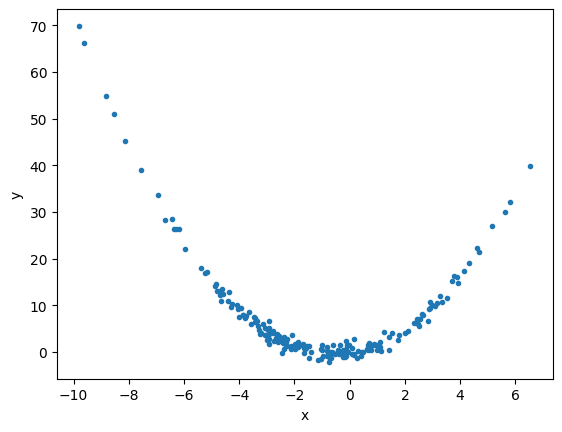

In [94]:
#generating random data
X= 3*np.random.randn(200,1)-1
y= 0.8*(X**2)+(0.9*X)+(np.random.randn(200,1))

plt.scatter(X,y, marker='.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [95]:
X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [96]:
lr= linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
y_pred= lr.predict(X_test)
r2_score(y_test,y_pred)# variances between the test and pred/ total variance

0.05221609095790403

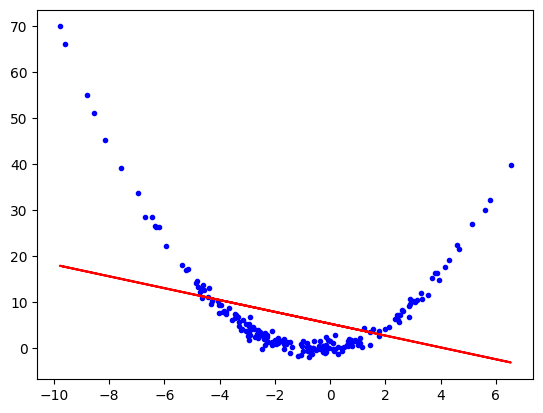

In [98]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.scatter(X,y,color='b',marker='.')
plt.show()

In [99]:
#Applying Polynomial Linear Regression

poly= PolynomialFeatures(degree=2, include_bias=True)

X_train_trans= poly.fit_transform(X_train)
X_test_trans= poly.transform(X_test)


In [100]:
print(X_test[0])
print(X_test_trans[0])

[0.44415323]
[1.         0.44415323 0.19727209]


In [101]:
#including bias parameter and applying polynomial regression

In [102]:
pr= linear_model.LinearRegression()
pr.fit(X_train_trans, y_train)

LinearRegression()

In [103]:
y_pred= pr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.9952585811936608

In [104]:
print(pr.coef_)
print(pr.intercept_)

[[0.         0.90886452 0.80863546]]
[-0.1478224]


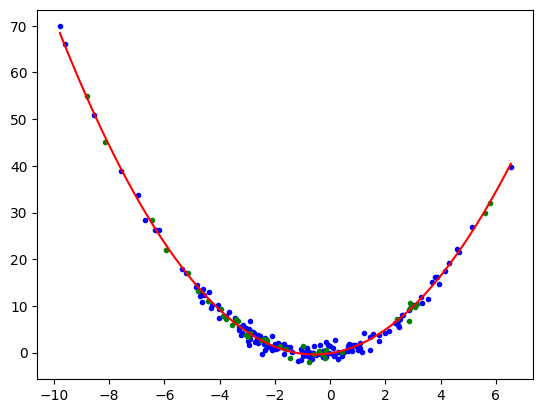

In [105]:
plt.scatter(X_train, y_train, color='b', marker='.')
plt.scatter(X_test, y_test, color='g', marker='.')

X_new= np.linspace(X_train.min(), X_train.max(), 200).reshape(200,1)#to get one line
X_new_poly= poly.transform(X_new)
y_new= pr.predict(X_new_poly)

plt.plot(X_new, y_new, color="r")



